1 - Se denomina sesgo de un estimador a la diferencia entre la esperanza (valor esperado) del estimador y el verdadero valor del parámetro a estimar.

2 - Un estimador es asintóticamente insesgado si su posible sesgo tiende a 0 al aumentar el tamaño muestral.

3 - Un estimador es consistente si es asintóticamente insesgado y que además su varianza tienda a 0 al aumentar el tamaño muestral.

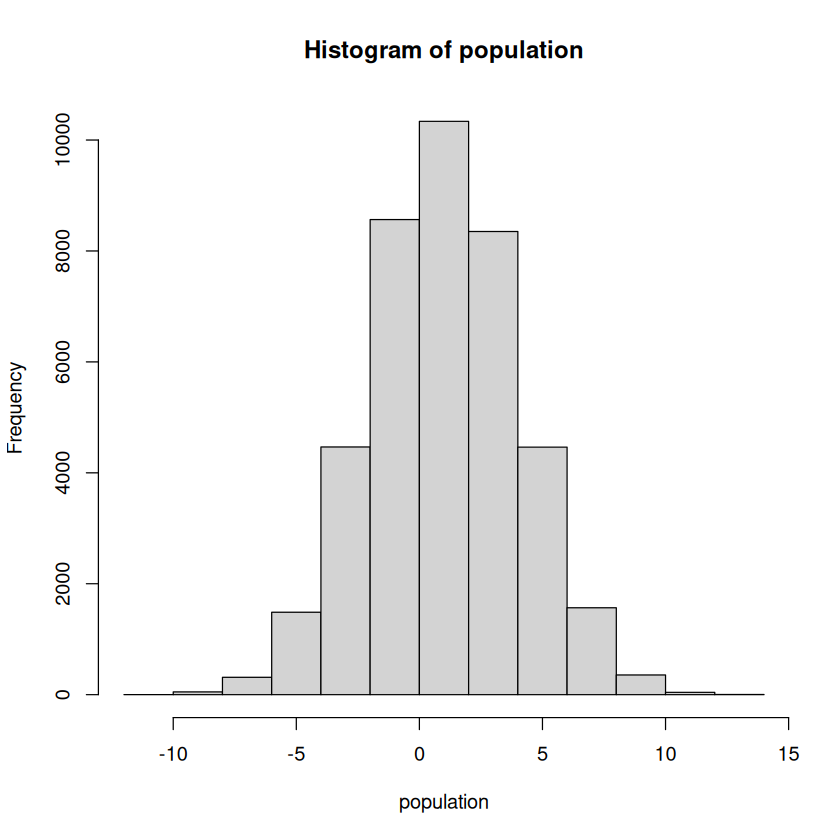

In [1]:
proposed_mean <- 1
proposed_sd <- 3

population <- rnorm(n = 40000, mean = proposed_mean, sd = proposed_sd)
hist(population)

In [2]:
number_observations <- 10000
sample_size <- 2000
samples <- list()
for (i in 1:number_observations) {
  samples[[i]] <- sample(population, sample_size)
}


In [3]:
get_sesgo <- function(actual_value, estimator, sampleS)
{
    sesgo <-  mean(sapply(sampleS, estimator)) - actual_value 
    return(sesgo)
}

In [4]:
get_variance <- function(estimator, sampleS)
{
    mean_estimator <- mean(sapply(sampleS, estimator))
    variance <- mean(
        sapply(
            sapply(sampleS, estimator),
            function(x) (x - mean_estimator)^2
        )
    )
    
    return(variance)
}

## Estimador $\hat{X} = \frac{1}{n}\sum_{i = 1}^n x_i$

En el caso de usar como estimador a la media no tiene sesgo porque:

\begin{align*}
E[\hat{X}] &= E[\frac{1}{n}\sum_{i = 1}^{n} x_i] \\
           &= \frac{1}{n}E[\sum_{i = 1}^{n} x_i] \\
           &= \mu
\end{align*}

\begin{align*}
b(\hat{X}) &= E[\hat{X}] - X \\
           &= \mu - \mu \\
           &= 0
\end{align*}

Pero eso está duro porque eso means que el sesgo no depende de neither la cantidad de observaciones ni de el sample_size.

In [5]:
actual_value_mean <- get_sesgo(proposed_mean, function(x) mean(x), samples)
expected_value_mean <- 0

print(actual_value_mean)
print(expected_value_mean)

[1] 0.006111804
[1] 0


Por tanto es insesgado, para saber si es consistente, es necesario calcular la varianza de el estimador en función de el sample_size.

La varianza es el cuadrado de la desviación estándar, es calculada para un estimador $\hat{X}$:

$$v(\hat{X}) \stackrel{:}{=} E[(\hat{X} - E[\hat{X}])²]$$  


In [6]:
actual_value_variance <- get_variance(function(x) mean(x), samples)
expected_value_variance <- proposed_sd^2 / sample_size

print(actual_value_variance)

print(expected_value_variance)

[1] 0.004304737
[1] 0.0045


El cálculo parece indicar que aumentando el tamaño de el sample_size el valor de la varianza tiende a 0, lo que significa que el estimador "mean" es consistente.

\begin{align*}

v(\hat{X}) &= v(\frac{1}{n} \sum_{i = 1}^n x_i) \\
           &= \frac{1}{n^2} \sum_{i = 1}^n v(x_i) \\
           &= \frac{ \sigma^2}{n} 

           \end{align*}

## Estimador  $\hat{\theta} = \frac{1}{n^2}\sum_{i = 1}^{n} x_i$

Con respecto a el estimador: $\hat{\theta} = \frac{1}{n^2}\sum_{i = 1}^{n} x_i$ posee sesgo:

$b(\hat{\theta}) = \mu ( \frac{1}{n} - 1)$

Que converge a $-\mu$, por lo que no es asintóticamente insesgado.

In [7]:
actual_value_est2 <- get_sesgo(
    proposed_mean, 
    function(x) mean(x) / length(x), 
    samples
)
expected_value_est2 <- proposed_mean * (1 / sample_size - 1)

print(actual_value_est2)
print(expected_value_est2)

[1] -0.9994969
[1] -0.9995


In [9]:
actual_variance_est2 <- get_variance(function(x) mean(x) / length(x), samples)
expected_variance_est2 <- proposed_sd^2 / sample_size^3

print(actual_variance_est2)
print(expected_variance_est2)

[1] 0.000000001076184
[1] 0.000000001125


La varianza converge a $0$, para ser consistente es necesario también que no tenga sesgo asintóticamente pero lo posee.